In [25]:
import sympy
from sympy.solvers import solve
from sympy.abc import a, b, c
x = sympy.Symbol("x", real=True)

In [26]:
bruch = []

p = lambda x: x**3
q = lambda x: (x-1)
bruch.append([q, p])

p = lambda x: x**4+x**2
q = lambda x: x**4-1
bruch.append([q, p])

p = lambda x: x**2+x+1
q = lambda x: x**2+1
bruch.append([q, p])

p = lambda x: 8*x
q = lambda x: (x**2-1)*(x-1)**2
bruch.append([q, p])

p = lambda x: 1
q = lambda x: (x**8-1)*(x**2+1)
bruch.append([q, p])

factors: {x - 1: 1, x - I: 2, x + sqrt(2)/2 - sqrt(2)*I/2: 1, x + sqrt(2)/2 + sqrt(2)*I/2: 1, x - sqrt(2)/2 - sqrt(2)*I/2: 1, x - sqrt(2)/2 + sqrt(2)*I/2: 1, x + I: 2, x + 1: 1}


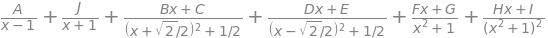

In [27]:
for item in bruch:
    q, p = item
    _, factors = sympy.factor_list(q(x), x, extension=[sympy.I, sympy.sqrt(2)])
    facts = {}
    for factor in factors:
        if factor[0] in facts:
            facts[factor[0]] += factor[1]
        else:
            facts[factor[0]] = factor[1]

letters = map(chr, range(65, 123))

symbols = []

term = 0
print(f"factors: {facts}")
for fact, mult in facts.items():
    nst = solve(fact - x- a, a)[0]
    if nst.is_real:
        for i in range(mult):
            symbol = sympy.Symbol(next(letters))
            term += symbol / (fact**(i+1))
            symbols.append(symbol)
    elif sympy.im(nst) > 0:
        result = solve(fact * sympy.conjugate(fact) - ((x-b)**2 - c), b,c, dict=True)[0]
        beta, gamma = result[b], result[c]
        for i in range(mult):
            A = sympy.Symbol(next(letters))
            B = sympy.Symbol(next(letters))
            symbols.append(A)
            symbols.append(B)
            term += (A*x+B)/(((x-beta)**2-gamma))**(i+1)
term

In [28]:
result = solve(term - p(x)/q(x), symbols)
result

In [29]:
sympy.simplify(p(x) * term.subs(result))

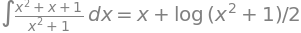

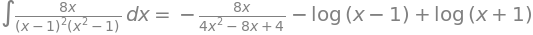

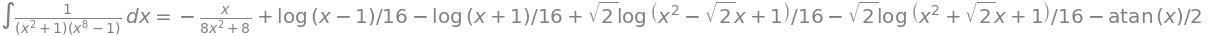

In [30]:
import sympy as sp
sp.init_printing()

x = sp.symbols('x')
f1 = x**3 / (x - 1)
f2 = (x**4 + x**2) / (x**4 - 1)
f3 = (x**2 + x + 1) / (x**2 + 1)
f4 = 8*x / ((x**2 - 1)*(x - 1)**2)
f5 = 1 / ((x**8 - 1)*(x**2 + 1))

F1 = sp.integrate(f1, x)
F2 = sp.integrate(f2, x)
F3 = sp.integrate(f3, x)
F4 = sp.integrate(f4, x)
F5 = sp.integrate(f5, x)

display(sp.Eq(sp.Integral(f1, x), F1, evaluate=False))
display(sp.Eq(sp.Integral(f2, x), F2, evaluate=False))
display(sp.Eq(sp.Integral(f3, x), F3, evaluate=False))
display(sp.Eq(sp.Integral(f4, x), F4, evaluate=False))
display(sp.Eq(sp.Integral(f5, x), F5, evaluate=False))